# Problem Statement

### Global Power Plant Database

#### Problem Statement:
#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Importing Libraries

In [1]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import warnings 
warnings.filterwarnings("ignore")
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm


######################################
       Import Key Packages            
######################################


# Reading dataFrame

In [3]:
df = pd.read_csv('database_IND.csv')

# Checking the data overview

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Checking data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

## Lets see the output types

In [6]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Observation- For Primary_fuel we need to create classifiction model

In [7]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

Observation- For capacity_mw it will be regression model

# Lets see the Data types of the columns


In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Dropping unnecessary columns

In [9]:
df.drop(["url", "country","source","generation_data_source","wepp_id"],axis=1,inplace=True)

In [10]:
df.shape

(907, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_long              907 non-null    object 
 1   name                      907 non-null    object 
 2   gppd_idnr                 907 non-null    object 
 3   capacity_mw               907 non-null    float64
 4   latitude                  861 non-null    float64
 5   longitude                 861 non-null    float64
 6   primary_fuel              907 non-null    object 
 7   other_fuel1               198 non-null    object 
 8   other_fuel2               1 non-null      object 
 9   other_fuel3               0 non-null      float64
 10  commissioning_year        527 non-null    float64
 11  owner                     342 non-null    object 
 12  geolocation_source        888 non-null    object 
 13  year_of_capacity_data     519 non-null    float64
 14  generation

In [12]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

Observation- gppd_idnr is unique for each plant so I can drop this column

In [13]:
df.drop(["gppd_idnr"],axis=1,inplace=True)

In [14]:
df.shape

(907, 21)

In [15]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

Observation- We can see NAN is present in this columns

In [16]:
df['estimated_generation_gwh']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: estimated_generation_gwh, Length: 907, dtype: float64

observation- I can see all values are NAN and we are good to drop this column

In [17]:
df.drop(["estimated_generation_gwh"],axis=1,inplace=True)

In [18]:
df.shape

(907, 20)

In [19]:
df['generation_gwh_2019'].unique()

array([nan])

In [20]:
df['generation_gwh_2013'].unique()

array([nan])

In [21]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [22]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [23]:
df['other_fuel3'].unique()

array([nan])

Observation- generation_gwh_2019,generation_gwh_2013 and other_fuel3, other_fuel2 has all null values present so I am dropping them off

In [24]:
df.drop(["generation_gwh_2019", "generation_gwh_2013","other_fuel3"],axis=1,inplace=True)

In [25]:
df.drop(["other_fuel2"],axis=1,inplace=True)

In [26]:
df.shape

(907, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_long           907 non-null    object 
 1   name                   907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   latitude               861 non-null    float64
 4   longitude              861 non-null    float64
 5   primary_fuel           907 non-null    object 
 6   other_fuel1            198 non-null    object 
 7   commissioning_year     527 non-null    float64
 8   owner                  342 non-null    object 
 9   geolocation_source     888 non-null    object 
 10  year_of_capacity_data  519 non-null    float64
 11  generation_gwh_2014    398 non-null    float64
 12  generation_gwh_2015    422 non-null    float64
 13  generation_gwh_2016    434 non-null    float64
 14  generation_gwh_2017    440 non-null    float64
 15  genera

In [28]:
df[['name','owner']].value_counts()

name                                   owner                                                
ACME Solar Tower                       Solar Paces                                              1
Phagi Solar Power Plant                Rajasthan Renewable Energy Corporation Limited (RREC)    1
Punjawa - Sikh Wala Solar Power Plant  Azure Urja Private Limited                               1
Precious Solar Power Plant             Precious Energy Services Pvt Ltd                         1
Pratapgarh Solar Power Plant           Integrated Coal Mining (ICML)                            1
                                                                                               ..
IL&FS Kaladeh Wind Farm                IL&FS Wind Power Limited                                 1
Horti Solar Power Plant                Essel MP Energy Limited                                  1
HZL Samana Wind Farm                   Hindustan Zinc Ltd.                                      1
HZL Palladum Wind Farm   

Observation- Name and owner are having mostly similarities and I am dropping the owner column as it has more null values

In [29]:
df.drop(["owner"],axis=1,inplace=True)

In [30]:
df.shape

(907, 15)

### Lets take a closer look into geolocation_source

In [31]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [32]:
df.loc[df['geolocation_source']=='National Renewable Energy Laboratory']

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
198,India,Dhursar,125.0,26.7846,72.0083,Solar,NaN,2014.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
199,India,Diwakar,100.0,27.7355,71.6917,Solar,NaN,2013.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
245,India,Godawari,50.0,27.6003,72.2241,Solar,NaN,2013.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.loc[df['geolocation_source']=='Industry About']

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
26,India,Amarsar Solar Power Plant,1.0,28.3615,74.2402,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
28,India,Ananthapur - Meil Solar Power Plant,50.0,14.9455,77.6870,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
32,India,Askandra - DREPL Solar Power Plant,5.0,27.3473,71.6917,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
33,India,Askandra - Electromech Maritech Solar Power Plant,5.0,27.3600,71.6918,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
34,India,Askandra - Finehope Solar Power Plant,5.0,27.3632,71.6918,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,India,Tinwari - MB Solar Power Plant,5.0,26.5182,72.8536,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
887,India,Vastan Solar Power Plant,5.0,21.4239,73.1273,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
894,India,Wadgam Solar Power Plant,15.0,22.3172,72.4397,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
895,India,Warora Solar Power Plant,25.0,20.3010,79.0237,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df[df['geolocation_source'].isna()]

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
25,India,Abhijeet,50.00,NaN,NaN,Solar,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,India,BCPL Wind Farm,5.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,India,Davangere Wind Farm,125.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,India,Essel Mining Wind Farm,75.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,India,Gujurat Solar On,28.00,NaN,NaN,Solar,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,India,KVK Energy Solar Project,100.00,NaN,NaN,Solar,NaN,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,India,Landewadi Wind Farm,4.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,India,Megha Solar Plant,50.00,NaN,NaN,Solar,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,India,NSL Wind Farm,27.65,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,India,RSMNL Wind Farm,22.50,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation- I will be using Mode to replace thge null values

In [35]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_long           907 non-null    object 
 1   name                   907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   latitude               861 non-null    float64
 4   longitude              861 non-null    float64
 5   primary_fuel           907 non-null    object 
 6   other_fuel1            198 non-null    object 
 7   commissioning_year     527 non-null    float64
 8   geolocation_source     907 non-null    object 
 9   year_of_capacity_data  519 non-null    float64
 10  generation_gwh_2014    398 non-null    float64
 11  generation_gwh_2015    422 non-null    float64
 12  generation_gwh_2016    434 non-null    float64
 13  generation_gwh_2017    440 non-null    float64
 14  generation_gwh_2018    448 non-null    float64
dtypes: flo

### Lets a closer look into  year_of_capacity_data and commissioning_year

In [37]:
df[["commissioning_year","year_of_capacity_data"]]

,commissioning_year,year_of_capacity_data
0,2011.0,NaN
1,NaN,NaN
2,NaN,NaN
3,2004.0,2019.0
4,2015.0,2019.0
...,...,...
902,2016.0,2019.0
903,NaN,NaN
904,NaN,NaN
905,NaN,NaN


<AxesSubplot:xlabel='year_of_capacity_data', ylabel='count'>

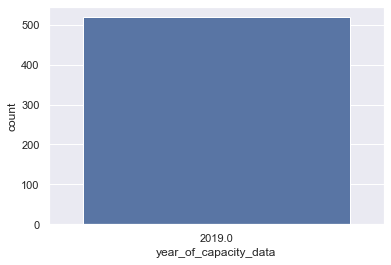

In [38]:
sns.countplot(x=df["year_of_capacity_data"])

In [39]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

Observation- Year when data is taken is 2019 so it will be 2019 for all the reocrds so I am dropping this column as no varity of data will be needed and it will not be responsible for model building 

In [40]:
df.drop(["year_of_capacity_data"],axis=1,inplace=True)

In [41]:
df["commissioning_year"].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [42]:
df[df['commissioning_year'].isna()]

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
17,India,ANUPPUR,600.0,23.0666,81.7841,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
19,India,ARVINDNAGAR SUGAR,10.0,18.0845,76.1851,Biomass,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
20,India,ASHOKNAGAR MILL,17.0,19.5867,74.7061,Biomass,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,India,YASHWANTRAO MOHITE,16.0,17.1653,74.2456,Biomass,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN


Observation- Since each record has unique plant so we cannot replace the commissioning_year with the common plant thats why dropping the column

In [43]:
df.drop(["commissioning_year"],axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_long         907 non-null    object 
 1   name                 907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   other_fuel1          198 non-null    object 
 7   geolocation_source   907 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(5)
memory usage: 92.2+ KB


### Lets do something with the otherfuel column

In [45]:
df[df['other_fuel1'].isna()]

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,WRI,617.789264,843.7470,886.004428,663.7745,626.239128
6,India,ALIYAR,60.0,10.4547,77.0078,Hydro,NaN,WRI,157.558250,152.1952,61.421350,89.6296,48.327150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,India,YELHANKA (DG),106.6,13.1156,77.5838,Oil,NaN,WRI,0.000000,0.0000,0.000000,NaN,0.000000
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN


Observation- Few plants have other fuel to use in the plant and rest have no other fuel apart from primary fuel to use in the plant so I will be replacing the null values with no secondary fuel

In [46]:
df['other_fuel1'] = df['other_fuel1'].fillna("No secondary fuel")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_long         907 non-null    object 
 1   name                 907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   other_fuel1          907 non-null    object 
 7   geolocation_source   907 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(5)
memory usage: 92.2+ KB


In [48]:
df.head(10)

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,No secondary fuel,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,No secondary fuel,WRI,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,No secondary fuel,WRI,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,No secondary fuel,WRI,617.789264,843.7470,886.004428,663.774500,626.239128
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,WRI,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,India,AKRIMOTA LIG,250.0,23.7689,68.6447,Coal,Oil,WRI,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,India,ALIYAR,60.0,10.4547,77.0078,Hydro,No secondary fuel,WRI,157.558250,152.1952,61.421350,89.629600,48.327150
7,India,ALLAIN DUHANGAN,192.0,32.2258,77.2070,Hydro,No secondary fuel,WRI,674.391100,721.3352,675.724400,679.594950,579.318850
8,India,ALMATTI DAM,290.0,16.3300,75.8863,Hydro,No secondary fuel,WRI,480.594950,144.4342,402.029750,439.372100,406.377900
9,India,AMAR KANTAK,210.0,23.1642,81.6373,Coal,Oil,WRI,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000


# Checking the distribution of the target

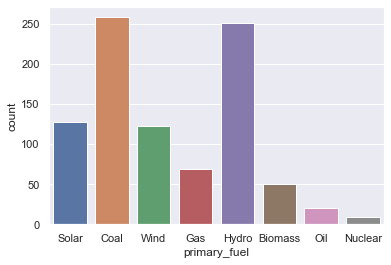

In [49]:
sns.countplot(x='primary_fuel',data=df)
plt.show()

Observation- Most of the plant use Coal as the Primary fuel and Hyrdo is the second most used fuel 

In [50]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

### Filling the null values of generation_gwh of different years with its mean values

#### generation_gwh_2014

In [51]:
df_2014=df.loc[df['generation_gwh_2014'].notnull()]
df_2014["primary_fuel"].unique()       

array(['Gas', 'Coal', 'Hydro', 'Oil', 'Nuclear'], dtype=object)

In [52]:
# calculation of multiplier for capacity with power generated for gas in 2014 to fill the null values
df_2014_gas= df_2014.loc[df_2014["primary_fuel"]=='Gas']
df_2014_gas['Variance']=df_2014_gas['generation_gwh_2014']/df_2014_gas['capacity_mw']
gas_multi= df_2014_gas['Variance'].mean()    
gas_multi

2.4656692429520137

In [53]:
# calculation of multiplier for capacity with power generated for Coal in 2014 to fill the null values
df_2014_coal= df_2014.loc[df_2014["primary_fuel"]=='Coal']
df_2014_coal['Variance']=df_2014_coal['generation_gwh_2014']/df_2014_coal['capacity_mw']
coal_multi= df_2014_coal['Variance'].mean()    
coal_multi

4.319886489258552

In [54]:
# calculation of multiplier for capacity with power generated for Hydro in 2014 to fill the null values
df_2014_Hydro= df_2014.loc[df_2014["primary_fuel"]=='Hydro']
df_2014_Hydro['Variance']=df_2014_Hydro['generation_gwh_2014']/df_2014_Hydro['capacity_mw']
Hydro_multi= df_2014_Hydro['Variance'].mean()    
Hydro_multi

3.1650266140682475

In [55]:
# calculation of multiplier for capacity with power generated for Oil in 2014 to fill the null values
df_2014_Oil= df_2014.loc[df_2014["primary_fuel"]=='Oil']
df_2014_Oil['Variance']=df_2014_Oil['generation_gwh_2014']/df_2014_Oil['capacity_mw']
Oil_multi= df_2014_Oil['Variance'].mean()    
Oil_multi

0.7374531385859672

In [56]:
# calculation of multiplier for capacity with power generated for Nuclear in 2014 to fill the null values
df_2014_Nuclear= df_2014.loc[df_2014["primary_fuel"]=='Nuclear']
df_2014_Nuclear['Variance']=df_2014_Nuclear['generation_gwh_2014']/df_2014_Nuclear['capacity_mw']
Nuclear_multi= df_2014_Nuclear['Variance'].mean()    
Nuclear_multi

5.714276844253762

In [57]:
df_2014_null=df.loc[df['generation_gwh_2014'].isnull()]
for i in df_2014_null['primary_fuel']:
    if (i=='Gas'):
        df['generation_gwh_2014']= df['capacity_mw']*gas_multi
    elif (i=='Coal'):
        df['generation_gwh_2014']= df['capacity_mw']*coal_multi
    elif (i=='Hydro'):
        df['generation_gwh_2014']= df['capacity_mw']*Hydro_multi
    elif (i=='Oil'):
        df['generation_gwh_2014']= df['capacity_mw']*Oil_multi
    elif (i=='Nuclear'):
        df['generation_gwh_2014']= df['capacity_mw']*Nuclear_multi

#### generation_gwh_2015

In [70]:
df_2015=df.loc[df['generation_gwh_2015'].notnull()]
df_2015["primary_fuel"].unique() 

array(['Gas', 'Coal', 'Hydro', 'Oil', 'Nuclear'], dtype=object)

In [71]:
# calculation of multiplier for capacity with power generated for gas in 2014 to fill the null values
df_2015_gas= df_2015.loc[df_2015["primary_fuel"]=='Gas']
df_2015_gas['Variance']=df_2015_gas['generation_gwh_2015']/df_2015_gas['capacity_mw']
gas_multi= df_2015_gas['Variance'].mean()    
gas_multi

2.4070468185299494

In [72]:
# calculation of multiplier for capacity with power generated for Coal in 2014 to fill the null values
df_2015_coal= df_2015.loc[df_2015["primary_fuel"]=='Coal']
df_2015_coal['Variance']=df_2015_coal['generation_gwh_2015']/df_2015_coal['capacity_mw']
coal_multi= df_2015_coal['Variance'].mean()    
coal_multi

4.042513350244294

In [73]:
# calculation of multiplier for capacity with power generated for Hydro in 2014 to fill the null values
df_2015_Hydro= df_2015.loc[df_2015["primary_fuel"]=='Hydro']
df_2015_Hydro['Variance']=df_2015_Hydro['generation_gwh_2015']/df_2015_Hydro['capacity_mw']
Hydro_multi= df_2015_Hydro['Variance'].mean()    
Hydro_multi

2.8858140053747

In [74]:
# calculation of multiplier for capacity with power generated for Oil in 2014 to fill the null values
df_2015_Oil= df_2015.loc[df_2015["primary_fuel"]=='Oil']
df_2015_Oil['Variance']=df_2015_Oil['generation_gwh_2015']/df_2015_Oil['capacity_mw']
Oil_multi= df_2015_Oil['Variance'].mean()    
Oil_multi

0.2151597815929957

In [75]:
# calculation of multiplier for capacity with power generated for Nuclear in 2014 to fill the null values
df_2015_Nuclear= df_2015.loc[df_2015["primary_fuel"]=='Nuclear']
df_2015_Nuclear['Variance']=df_2015_Nuclear['generation_gwh_2015']/df_2015_Nuclear['capacity_mw']
Nuclear_multi= df_2015_Nuclear['Variance'].mean()    
Nuclear_multi

5.058826148388649

In [84]:
df_2015_null=df.loc[df['generation_gwh_2015'].isnull()]
for i in df_2015_null['primary_fuel']:
    if (i=='Gas'):
        df['generation_gwh_2015']= df['capacity_mw']*gas_multi
    elif (i=='Coal'):
        df['generation_gwh_2015']= df['capacity_mw']*coal_multi
    elif (i=='Hydro'):
        df['generation_gwh_2015']= df['capacity_mw']*Hydro_multi
    elif (i=='Oil'):
        df['generation_gwh_2015']= df['capacity_mw']*Oil_multi
    elif (i=='Nuclear'):
        df['generation_gwh_2015']= df['capacity_mw']*Nuclear_multi

#### generation_gwh_2016

In [85]:
df_2016=df.loc[df['generation_gwh_2016'].notnull()]
df_2016["primary_fuel"].unique() 

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [86]:
# calculation of multiplier for capacity with power generated for gas in 2014 to fill the null values
df_2016_gas= df_2016.loc[df_2016["primary_fuel"]=='Gas']
df_2016_gas['Variance']=df_2016_gas['generation_gwh_2016']/df_2016_gas['capacity_mw']
gas_multi= df_2016_gas['Variance'].mean()    
gas_multi

4.042513350244293

In [87]:
# calculation of multiplier for capacity with power generated for Coal in 2014 to fill the null values
df_2016_coal= df_2016.loc[df_2016["primary_fuel"]=='Coal']
df_2016_coal['Variance']=df_2016_coal['generation_gwh_2016']/df_2016_coal['capacity_mw']
coal_multi= df_2016_coal['Variance'].mean()    
coal_multi

4.0425133502443185

In [88]:
# calculation of multiplier for capacity with power generated for Hydro in 2014 to fill the null values
df_2016_Hydro= df_2016.loc[df_2016["primary_fuel"]=='Hydro']
df_2016_Hydro['Variance']=df_2016_Hydro['generation_gwh_2016']/df_2016_Hydro['capacity_mw']
Hydro_multi= df_2016_Hydro['Variance'].mean()    
Hydro_multi

4.04251335024432

In [89]:
# calculation of multiplier for capacity with power generated for Oil in 2014 to fill the null values
df_2016_Oil= df_2016.loc[df_2016["primary_fuel"]=='Oil']
df_2016_Oil['Variance']=df_2016_Oil['generation_gwh_2016']/df_2016_Oil['capacity_mw']
Oil_multi= df_2016_Oil['Variance'].mean()    
Oil_multi

4.042513350244293

In [90]:
# calculation of multiplier for capacity with power generated for Nuclear in 2014 to fill the null values
df_2016_Nuclear= df_2016.loc[df_2016["primary_fuel"]=='Nuclear']
df_2016_Nuclear['Variance']=df_2016_Nuclear['generation_gwh_2016']/df_2016_Nuclear['capacity_mw']
Nuclear_multi= df_2016_Nuclear['Variance'].mean()    
Nuclear_multi

4.042513350244293

In [91]:
df_2016_null=df.loc[df['generation_gwh_2016'].isnull()]
for i in df_2016_null['primary_fuel']:
    if (i=='Gas'):
        df['generation_gwh_2016']= df['capacity_mw']*gas_multi
    elif (i=='Coal'):
        df['generation_gwh_2016']= df['capacity_mw']*coal_multi
    elif (i=='Hydro'):
        df['generation_gwh_2016']= df['capacity_mw']*Hydro_multi
    elif (i=='Oil'):
        df['generation_gwh_2016']= df['capacity_mw']*Oil_multi
    elif (i=='Nuclear'):
        df['generation_gwh_2016']= df['capacity_mw']*Nuclear_multi

#### generation_gwh_2017

In [92]:
df_2017=df.loc[df['generation_gwh_2017'].notnull()]
df_2017["primary_fuel"].unique() 

array(['Gas', 'Coal', 'Hydro', 'Oil', 'Nuclear'], dtype=object)

In [93]:
# calculation of multiplier for capacity with power generated for gas in 2014 to fill the null values
df_2017_gas= df_2017.loc[df_2017["primary_fuel"]=='Gas']
df_2017_gas['Variance']=df_2017_gas['generation_gwh_2017']/df_2017_gas['capacity_mw']
gas_multi= df_2017_gas['Variance'].mean()    
gas_multi

2.493283798376367

In [94]:
# calculation of multiplier for capacity with power generated for Coal in 2014 to fill the null values
df_2017_coal= df_2017.loc[df_2017["primary_fuel"]=='Coal']
df_2017_coal['Variance']=df_2017_coal['generation_gwh_2017']/df_2017_coal['capacity_mw']
coal_multi= df_2017_coal['Variance'].mean()    
coal_multi

4.096971744263869

In [95]:
# calculation of multiplier for capacity with power generated for Hydro in 2014 to fill the null values
df_2017_Hydro= df_2017.loc[df_2017["primary_fuel"]=='Hydro']
df_2017_Hydro['Variance']=df_2017_Hydro['generation_gwh_2017']/df_2017_Hydro['capacity_mw']
Hydro_multi= df_2017_Hydro['Variance'].mean()    
Hydro_multi

2.8267398869518474

In [96]:
# calculation of multiplier for capacity with power generated for Oil in 2014 to fill the null values
df_2017_Oil= df_2017.loc[df_2017["primary_fuel"]=='Oil']
df_2017_Oil['Variance']=df_2017_Oil['generation_gwh_2017']/df_2017_Oil['capacity_mw']
Oil_multi= df_2017_Oil['Variance'].mean()    
Oil_multi

0.0021246429656495776

In [97]:
# calculation of multiplier for capacity with power generated for Nuclear in 2014 to fill the null values
df_2017_Nuclear= df_2017.loc[df_2017["primary_fuel"]=='Nuclear']
df_2017_Nuclear['Variance']=df_2017_Nuclear['generation_gwh_2017']/df_2017_Nuclear['capacity_mw']
Nuclear_multi= df_2017_Nuclear['Variance'].mean()    
Nuclear_multi

4.60463106511544

In [98]:
df_2017_null=df.loc[df['generation_gwh_2017'].isnull()]
for i in df_2017_null['primary_fuel']:
    if (i=='Gas'):
        df['generation_gwh_2017']= df['capacity_mw']*gas_multi
    elif (i=='Coal'):
        df['generation_gwh_2017']= df['capacity_mw']*coal_multi
    elif (i=='Hydro'):
        df['generation_gwh_2017']= df['capacity_mw']*Hydro_multi
    elif (i=='Oil'):
        df['generation_gwh_2017']= df['capacity_mw']*Oil_multi
    elif (i=='Nuclear'):
        df['generation_gwh_2017']= df['capacity_mw']*Nuclear_multi

#### generation_gwh_2018

In [99]:
df_2018=df.loc[df['generation_gwh_2018'].notnull()]
df_2018["primary_fuel"].unique() 

array(['Gas', 'Coal', 'Hydro', 'Oil', 'Nuclear'], dtype=object)

In [100]:
# calculation of multiplier for capacity with power generated for gas in 2014 to fill the null values
df_2018_gas= df_2018.loc[df_2018["primary_fuel"]=='Gas']
df_2018_gas['Variance']=df_2018_gas['generation_gwh_2018']/df_2018_gas['capacity_mw']
gas_multi= df_2018_gas['Variance'].mean()    
gas_multi

2.4172433593020237

In [101]:
# calculation of multiplier for capacity with power generated for Coal in 2014 to fill the null values
df_2018_coal= df_2018.loc[df_2018["primary_fuel"]=='Coal']
df_2018_coal['Variance']=df_2018_coal['generation_gwh_2018']/df_2018_coal['capacity_mw']
coal_multi= df_2018_coal['Variance'].mean()    
coal_multi

4.159637416359294

In [102]:
# calculation of multiplier for capacity with power generated for Hydro in 2014 to fill the null values
df_2018_Hydro= df_2018.loc[df_2018["primary_fuel"]=='Hydro']
df_2018_Hydro['Variance']=df_2018_Hydro['generation_gwh_2018']/df_2018_Hydro['capacity_mw']
Hydro_multi= df_2018_Hydro['Variance'].mean()    
Hydro_multi

3.145218843813984

In [103]:
# calculation of multiplier for capacity with power generated for Oil in 2014 to fill the null values
df_2018_Oil= df_2018.loc[df_2018["primary_fuel"]=='Oil']
df_2018_Oil['Variance']=df_2018_Oil['generation_gwh_2018']/df_2018_Oil['capacity_mw']
Oil_multi= df_2018_Oil['Variance'].mean()    
Oil_multi

0.003225015151515152

In [104]:
# calculation of multiplier for capacity with power generated for Nuclear in 2014 to fill the null values
df_2018_Nuclear= df_2018.loc[df_2018["primary_fuel"]=='Nuclear']
df_2018_Nuclear['Variance']=df_2018_Nuclear['generation_gwh_2018']/df_2018_Nuclear['capacity_mw']
Nuclear_multi= df_2018_Nuclear['Variance'].mean()    
Nuclear_multi

4.430782856541606

In [105]:
df_2018_null=df.loc[df['generation_gwh_2018'].isnull()]
for i in df_2018_null['primary_fuel']:
    if (i=='Gas'):
        df['generation_gwh_2018']= df['capacity_mw']*gas_multi
    elif (i=='Coal'):
        df['generation_gwh_2018']= df['capacity_mw']*coal_multi
    elif (i=='Hydro'):
        df['generation_gwh_2018']= df['capacity_mw']*Hydro_multi
    elif (i=='Oil'):
        df['generation_gwh_2018']= df['capacity_mw']*Oil_multi
    elif (i=='Nuclear'):
        df['generation_gwh_2018']= df['capacity_mw']*Nuclear_multi

# Lets check the null value count again

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_long         907 non-null    object 
 1   name                 907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   other_fuel1          907 non-null    object 
 7   geolocation_source   907 non-null    object 
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
dtypes: float64(8), object(5)
memory usage: 92.2+ KB


Observation- Now data is removed of most null values but I can see Latitude and longitude still have null values

# Lets check the COuntry column

In [107]:
df['country_long'].unique()

array(['India'], dtype=object)

Observation- Country long has only India as county so no varity of data is present. We can drop this as it will not be required for model building

In [108]:
df.drop(["country_long"],axis=1,inplace=True)

In [109]:
df.drop(["name"],axis=1,inplace=True)

In [110]:
df.shape

(907, 11)

In [111]:
df.tail(10)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
897,34.65,8.8709,77.4466,Wind,No secondary fuel,WRI,149.684067,140.073088,140.073088,141.960071,144.131436
898,42.00,27.1715,70.6877,Wind,No secondary fuel,WRI,181.435233,169.785561,169.785561,172.072813,174.704771
899,600.00,30.1081,77.3257,Coal,Oil,WRI,2591.931894,2425.508010,2425.508010,2458.183047,2495.782450
900,16.00,17.1653,74.2456,Biomass,No secondary fuel,WRI,69.118184,64.680214,64.680214,65.551548,66.554199
901,106.60,13.1156,77.5838,Oil,No secondary fuel,WRI,460.499900,430.931923,430.931923,436.737188,443.417349
902,1600.00,16.2949,77.3568,Coal,Oil,WRI,6911.818383,6468.021360,6468.021360,6555.154791,6655.419866
903,3.00,12.8932,78.1654,Solar,No secondary fuel,Industry About,12.959659,12.127540,12.127540,12.290915,12.478912
904,25.50,15.2758,75.5811,Wind,No secondary fuel,WRI,110.157105,103.084090,103.084090,104.472779,106.070754
905,80.00,24.3500,73.7477,Coal,No secondary fuel,WRI,345.590919,323.401068,323.401068,327.757740,332.770993
906,16.50,9.9344,77.4768,Wind,No secondary fuel,WRI,71.278127,66.701470,66.701470,67.600034,68.634017


# Lets Visualize 

In [112]:
y= df['capacity_mw']
x= df.drop(['capacity_mw'], axis =1)

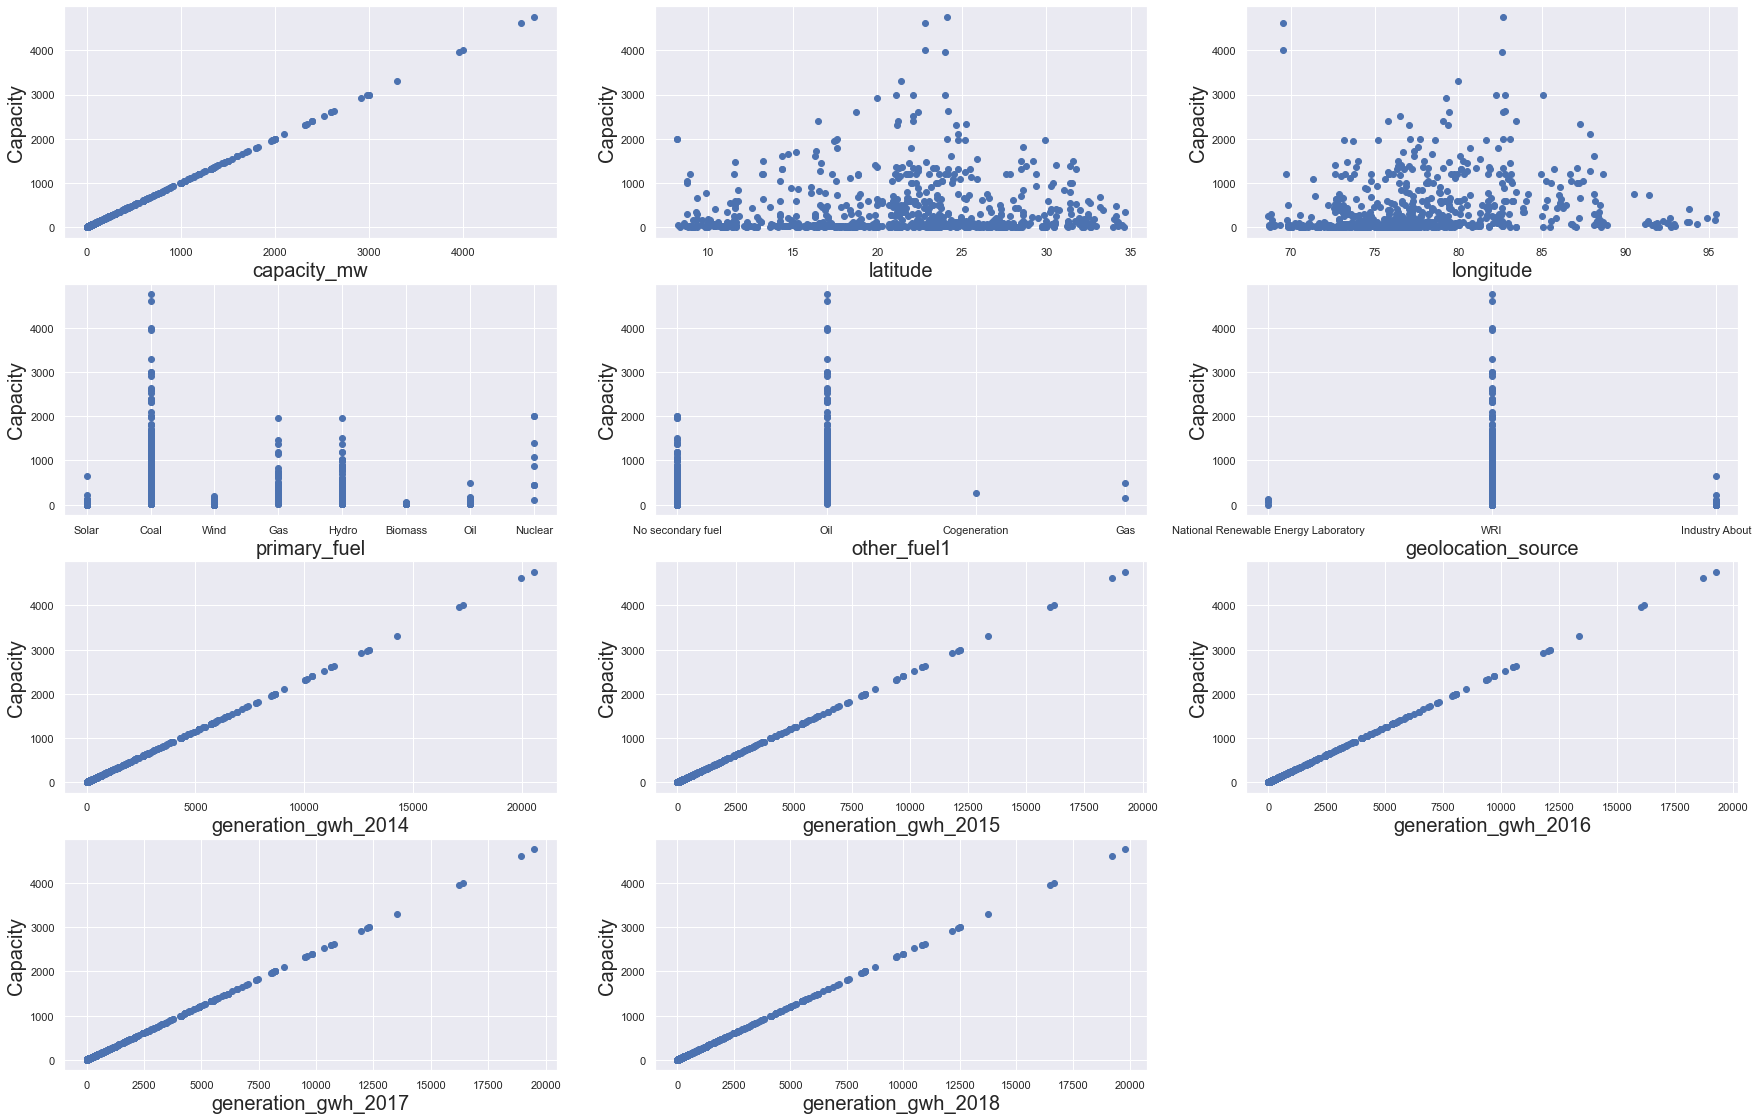

In [113]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in df:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Capacity',fontsize=20)
    plotnumber +=1
plt.show()

Observation- We can see most capacity is used for Coal plant followed by Hydro.

With the increase in capacity of plant the generation of power is also increasing

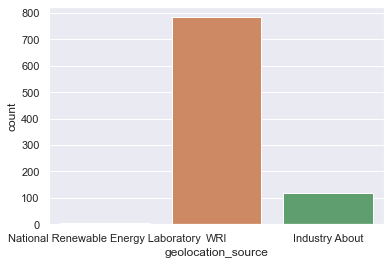

In [114]:
sns.countplot(x='geolocation_source',data=df)
plt.show()

Observation- WRI has most geolocation source and National Renewable Energy Laboratory has least

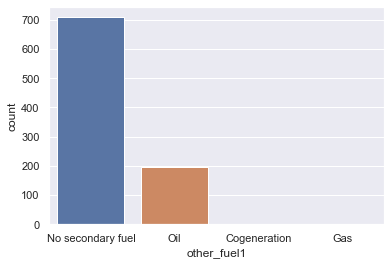

In [115]:
sns.countplot(x='other_fuel1',data=df)
plt.show()

Observation- Most of the plant has no other fuel types and few of them has Oil as other fuel for their plant

In [116]:
df.drop(["latitude","longitude"],axis=1,inplace=True)

# Lets encode the dataset

### Using Label encoder for categorical features

In [117]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['primary_fuel'] = label.fit_transform(df['primary_fuel'])
df['other_fuel1'] = label.fit_transform(df['other_fuel1'])
df['geolocation_source'] = label.fit_transform(df['geolocation_source'])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    int32  
 2   other_fuel1          907 non-null    int32  
 3   geolocation_source   907 non-null    int32  
 4   generation_gwh_2014  907 non-null    float64
 5   generation_gwh_2015  907 non-null    float64
 6   generation_gwh_2016  907 non-null    float64
 7   generation_gwh_2017  907 non-null    float64
 8   generation_gwh_2018  907 non-null    float64
dtypes: float64(6), int32(3)
memory usage: 53.3 KB


# Checking for Correlation

<AxesSubplot:>

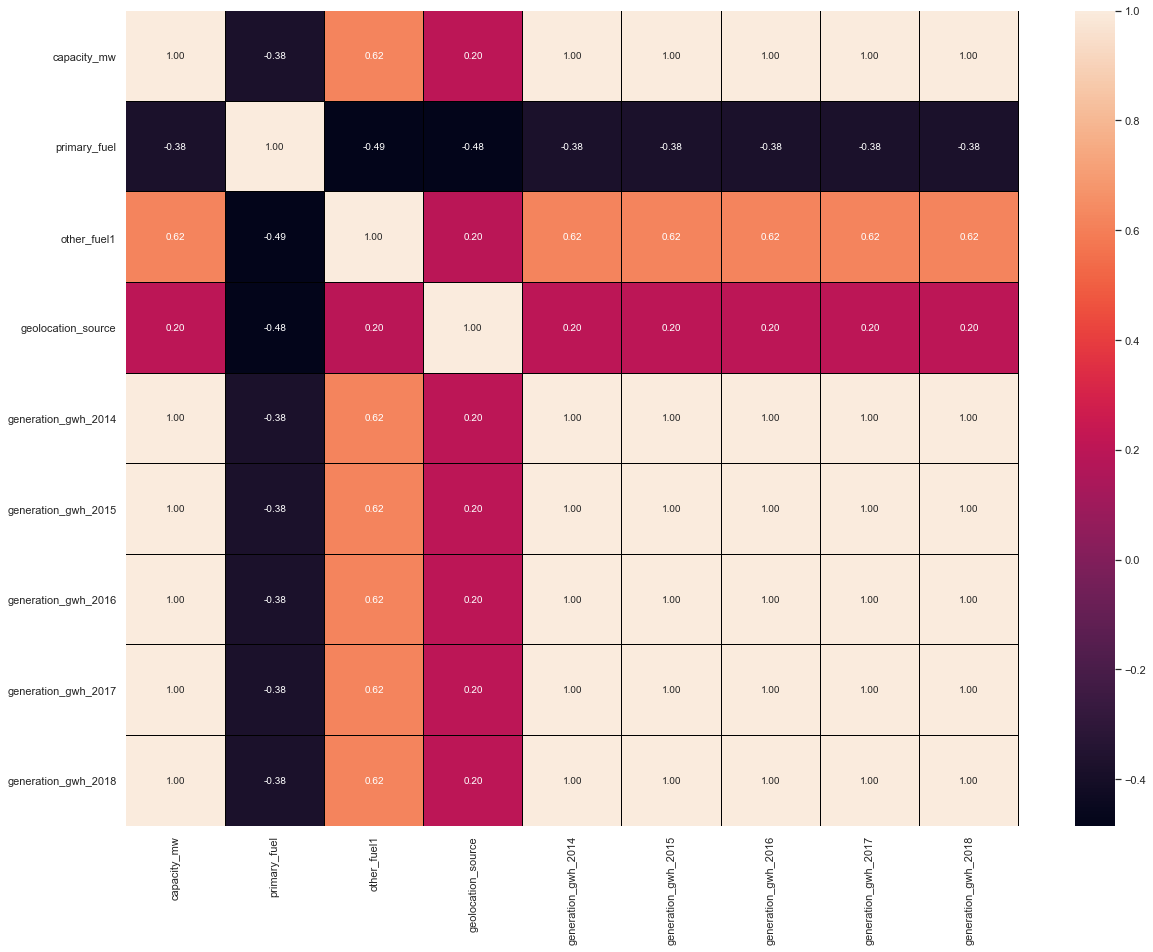

In [119]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

# Checking skewness

In [120]:
df.skew()

capacity_mw            3.123576
primary_fuel           0.472251
other_fuel1            1.109169
geolocation_source    -2.159841
generation_gwh_2014    3.123576
generation_gwh_2015    3.123576
generation_gwh_2016    3.123576
generation_gwh_2017    3.123576
generation_gwh_2018    3.123576
dtype: float64

Observation-- capacity_mw,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are positively skewed

### Using numpy.log1p() to remove the skewness nearest to 0.55
This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

log1p is reverse of exp(x) – 1

In [121]:
cont_features=df[["generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","capacity_mw"]]

In [122]:
for col in cont_features:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [123]:
df.skew()

capacity_mw            0.135454
primary_fuel           0.472251
other_fuel1            1.109169
geolocation_source    -2.159841
generation_gwh_2014    0.036894
generation_gwh_2015    0.039907
generation_gwh_2016    0.039907
generation_gwh_2017    0.039292
generation_gwh_2018    0.038598
dtype: float64

Skewness has been rduced

# Checking Outliers

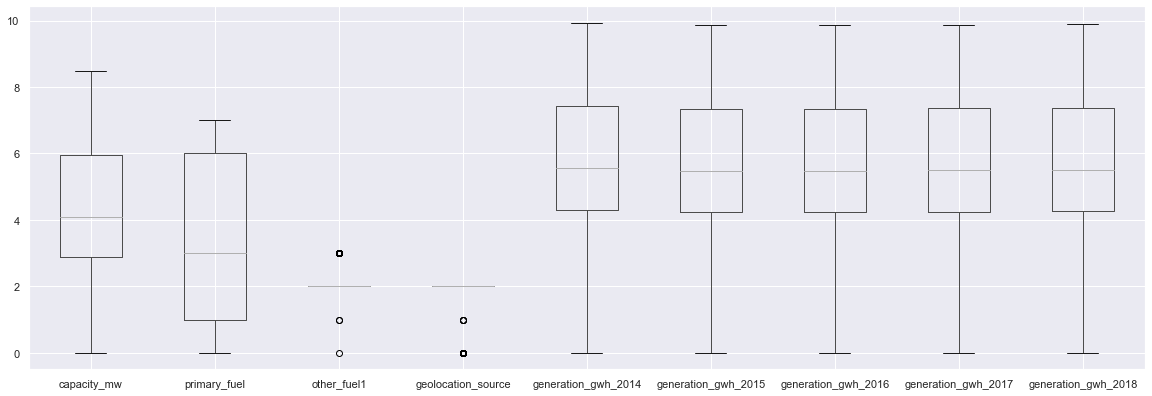

In [128]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Observation- No Outliers present

## Using Z Score method to remove outliers

In [129]:
df.shape

(907, 9)

In [130]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold =3 
np.where(z>3)

(array([811], dtype=int64), array([2], dtype=int64))

In [131]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,capacity_mw,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.252763,6,2,1,2.468075,2.407511,2.407511,2.419695,2.433534
1,4.595120,1,2,2,6.050556,5.984355,5.984355,5.997703,6.012846
2,3.693867,7,2,2,5.137794,5.071834,5.071834,5.085132,5.100219
3,4.912655,2,2,2,6.370217,6.303972,6.303972,6.317329,6.332482
4,7.496097,1,3,2,8.958900,8.892546,8.892546,8.905926,8.921103
...,...,...,...,...,...,...,...,...,...
902,7.378384,1,3,2,8.841133,8.774780,8.774780,8.788160,8.803337
903,1.386294,6,2,0,2.636172,2.574712,2.574712,2.587081,2.601126
904,3.277145,7,2,2,4.710945,4.645199,4.645199,4.658453,4.673490
905,4.394449,1,2,2,5.848145,5.781981,5.781981,5.795321,5.810455


In [132]:
df_new_z.shape

(906, 9)

# Percentage of Loss of data:

In [133]:
data_loss = ((907-906)/907)*100

In [134]:
data_loss

0.11025358324145534

around 0.1% of Data has been loss. 

# Checking VIF

In [135]:
names = list(df_new_z.drop(columns=["capacity_mw"]))

In [136]:
for index in range(0, len(names)):
            y = df_new_z.loc[:, df.columns == names[index]]
            x = df_new_z.loc[:, df.columns != names[index]]
            model = sm.OLS(y, x)                       #Fit ordinary least squares methodhttp://localhost:8888/notebooks/baseball%20predict.ipynb#
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )


R Square value of primary_fuel column is 0.8 keeping all other columns as independent features
Variance Inflation Factor of primary_fuel column is 5.03 n
R Square value of other_fuel1 column is 0.98 keeping all other columns as independent features
Variance Inflation Factor of other_fuel1 column is 58.3 n
R Square value of geolocation_source column is 0.92 keeping all other columns as independent features
Variance Inflation Factor of geolocation_source column is 12.81 n
R Square value of generation_gwh_2014 column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of generation_gwh_2014 column is inf n
R Square value of generation_gwh_2015 column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of generation_gwh_2015 column is 25516145197566.55 n
R Square value of generation_gwh_2016 column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of generation_gwh_2016 column is 450359962737049.

# Model Building

## Predicting capacity_mw`

In [137]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_new_z.drop('capacity_mw', axis=1)
y = df_new_z['capacity_mw']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

### Linear Regression

In [138]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 1.0000


 ### Ridge

In [139]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9985
Test Score : 0.9993


### Gradient Boost

In [140]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 0.9999


### K-Nearest Neighbors

In [141]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9978
Test Score : 0.9986


### Random Forest

In [142]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9999
Test Score : 1.0000


### Decision Tree

In [143]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 0.9999


# Hyperparameter Tuning

In [144]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

### Ridge

In [145]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.9999
Best Parameters : {'alpha': 0.0001}
Best CV Score : 0.9998


### Gradient Boost

In [146]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.9999
Best Parameters : {'max_depth': 5}
Best CV Score : 0.9997


### K-Nearest Neighbors

In [147]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.9983
Best Parameters : {'n_neighbors': 2}
Best CV Score : 0.9964


### Random Forest

In [148]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 1.0000
Best Parameters : {'max_depth': 10}
Best CV Score : 0.9997


### Decision Tree

In [149]:
am_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.9999
Best Parameters : {'max_depth': 10}
Best CV Score : 0.9997


### Result

In [150]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.999886
1,Gradient Boost,0.999916
2,K-Nearest Neighbors,0.998313
3,Random Forest,0.999968
4,Decision Tree,0.999912


### Conclusion
Random Forest Regression gave the best accuracy so we can use Random Forest regression to predict the Capacity

# Prediction with Primary Fuel

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [152]:
df_new_z

,capacity_mw,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.252763,6,2,1,2.468075,2.407511,2.407511,2.419695,2.433534
1,4.595120,1,2,2,6.050556,5.984355,5.984355,5.997703,6.012846
2,3.693867,7,2,2,5.137794,5.071834,5.071834,5.085132,5.100219
3,4.912655,2,2,2,6.370217,6.303972,6.303972,6.317329,6.332482
4,7.496097,1,3,2,8.958900,8.892546,8.892546,8.905926,8.921103
...,...,...,...,...,...,...,...,...,...
902,7.378384,1,3,2,8.841133,8.774780,8.774780,8.788160,8.803337
903,1.386294,6,2,0,2.636172,2.574712,2.574712,2.587081,2.601126
904,3.277145,7,2,2,4.710945,4.645199,4.645199,4.658453,4.673490
905,4.394449,1,2,2,5.848145,5.781981,5.781981,5.795321,5.810455


In [247]:
X1 = df.drop(['primary_fuel'], axis=1)
y1 = df['primary_fuel']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.35, random_state=1)

## Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  60.37735849056604
[[ 0  0  0 11  0  0  0 12]
 [ 0 70  0 20  0  0  0  7]
 [ 0  3  1 17  0  0  0  2]
 [ 0  0  0 69  0  0  0 28]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  2  0  0 40  0]
 [ 0  0  0 19  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.96      0.72      0.82        97
           2       1.00      0.04      0.08        23
           3       0.48      0.71      0.57        97
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      0.95      0.98        42
           7       0.20      0.39      0.26        31

    accuracy                           0.60       318
   macro avg       0.45      0.35      0.34       318
weighted avg       0.66      0.60      0.59       318



## Decision Tree Classifier

In [249]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  67.61006289308176
[[13  2  0  3  0  1  0  4]
 [ 5 74  1 14  0  0  0  3]
 [ 1  5  5 10  0  1  0  1]
 [ 8  8  4 70  0  0  0  7]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  2  0  0]
 [ 0  1  0  1  0  0 40  0]
 [ 2  2  1 14  0  1  0 11]]
              precision    recall  f1-score   support

           0       0.45      0.57      0.50        23
           1       0.80      0.76      0.78        97
           2       0.45      0.22      0.29        23
           3       0.61      0.72      0.66        97
           4       0.00      0.00      0.00         2
           5       0.40      0.67      0.50         3
           6       1.00      0.95      0.98        42
           7       0.42      0.35      0.39        31

    accuracy                           0.68       318
   macro avg       0.52      0.53      0.51       318
weighted avg       0.67      0.68      0.67       318



## Random Forest Classifier

In [250]:
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    print("Accuracy ", accuracy_score(y_test,predrf)*100)
    print(confusion_matrix(y_test,predrf))
    print(classification_report(y_test,predrf))

Accuracy  68.23899371069182
[[ 8  5  0  4  0  1  1  4]
 [ 3 75  1 15  0  0  0  3]
 [ 1  5  4 11  0  1  0  1]
 [ 6  4  2 77  0  0  1  7]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  2  0  0]
 [ 0  0  0  2  0  0 40  0]
 [ 1  1  0 17  0  1  0 11]]
              precision    recall  f1-score   support

           0       0.42      0.35      0.38        23
           1       0.83      0.77      0.80        97
           2       0.57      0.17      0.27        23
           3       0.60      0.79      0.68        97
           4       0.00      0.00      0.00         2
           5       0.40      0.67      0.50         3
           6       0.95      0.95      0.95        42
           7       0.42      0.35      0.39        31

    accuracy                           0.68       318
   macro avg       0.52      0.51      0.50       318
weighted avg       0.68      0.68      0.67       318



## SVC

In [251]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  57.861635220125784
[[ 0  0  0  1  0  0  0 22]
 [ 0 69  0 16  0  0  0 12]
 [ 0  3  0 18  0  0  0  2]
 [ 0  0  0 58  0  0  0 39]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  0  1]
 [ 0  0  0  3  0  0 39  0]
 [ 0  0  0 13  0  0  0 18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.96      0.71      0.82        97
           2       0.00      0.00      0.00        23
           3       0.51      0.60      0.55        97
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      0.93      0.96        42
           7       0.19      0.58      0.29        31

    accuracy                           0.58       318
   macro avg       0.33      0.35      0.33       318
weighted avg       0.60      0.58      0.57       318



# Cross Validation

### Logistic Regression

In [252]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,X_scaled,y1,cv=5)
print("Cross validation score of Logistic  model :", scr.mean())

Cross validation score of Logistic  model : 0.6207394815129622


### Decision Tree

In [253]:
scr = cross_val_score(dt,X_scaled,y1,cv=5)
print("Cross validation score of Random Forest  model :", scr.mean())

Cross validation score of Random Forest  model : 0.6395968672211765


### Random Forest

In [254]:
scr = cross_val_score(rf,X_scaled,y1,cv=5)
print("Cross validation score of Random Forest  model :", scr.mean())

Cross validation score of Random Forest  model : 0.6362940926476839


### SVC 

In [255]:
scr = cross_val_score(svc,X_scaled,y1,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.6141460749195555


#### Observation-
Random Forest gave us the most accuracy with highest Cross validation score as well as we will try to hyper tune the Random forest classifier

# Hyper Parameter Tuning

### Random Forest

In [275]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [6,7,8,9,10,11],
             'criterion': ['gini','entropy']}

In [276]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) 
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}

In [277]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.6446540880503144

# Conslusion

In [292]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com

,Original,Predicted
0,6,6
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
313,1,3
314,3,3
315,3,0
316,1,1


# Saving Models

### capacity_mw

In [297]:
import pickle
filename = 'capacity.pkl'
pickle.dump(grid_search.best_params_,open(filename, 'wb'))

### Primary Fuel

In [295]:
import pickle
filename = 'Primary_fuel.pkl'
pickle.dump(GCV.best_params_,open(filename, 'wb'))